In [9]:
import pandas as pd
import numpy as np


file_path = "/content/Lab Session Data.xlsx"
df = pd.read_excel(file_path, sheet_name="Purchase data")

A = df[["Candies (#)", "Mangoes (Kg)", "Milk Packets (#)"]].values
C = df["Payment (Rs)"].values.reshape(-1, 1)

x = np.linalg.pinv(A) @ C

print(A.shape, A.shape[1], np.linalg.matrix_rank(A), x)

df["Category"] = np.where(df["Payment (Rs)"] > 200, "RICH", "POOR")
print(df[["Customer", "Category"]])


(10, 3) 3 3 [[ 1.]
 [55.]
 [18.]]
  Customer Category
0      C_1     RICH
1      C_2     RICH
2      C_3     RICH
3      C_4     POOR
4      C_5     RICH
5      C_6     POOR
6      C_7     RICH
7      C_8     RICH
8      C_9     POOR
9     C_10     POOR


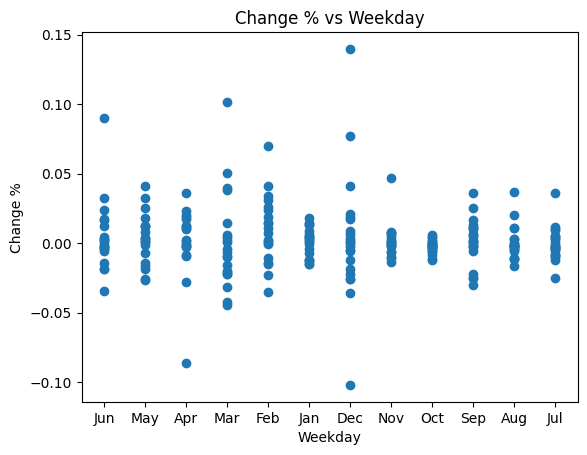

In [12]:
import pandas as pd
import statistics as stats
import matplotlib.pyplot as plt

file_path = "/content/Lab Session Data.xlsx"
df = pd.read_excel(file_path, sheet_name="IRCTC Stock Price")

stock_prices, percent_change = df.iloc[:, 3], df.iloc[:, 8]
trade_dates, weekdays = pd.to_datetime(df.iloc[:, 0]), df.iloc[:, 1]

# Compute statistics
avg_price, price_variance = stats.mean(stock_prices), stats.variance(stock_prices)

wednesday_prices = stock_prices[weekdays == "Wednesday"]
avg_wed_price = stats.mean(wednesday_prices) if not wednesday_prices.empty else None

april_prices = stock_prices[trade_dates.dt.month == 4]
avg_april_price = stats.mean(april_prices) if not april_prices.empty else None

loss_probability = (percent_change < 0).mean()
profit_wed = (percent_change[weekdays == "Wednesday"] > 0).mean() if (weekdays == "Wednesday").sum() > 0 else None
conditional_prob = profit_wed / (weekdays.eq("Wednesday").mean()) if profit_wed else None

plt.scatter(weekdays, percent_change)
plt.xlabel("Weekday")
plt.ylabel("Change %")
plt.title("Change % vs Weekday")
plt.show()


Jaccard Similarity: 0.967741935483871
Simple Matching Coefficient: 0.967741935483871
Cosine Similarity: 0.9999999968143457


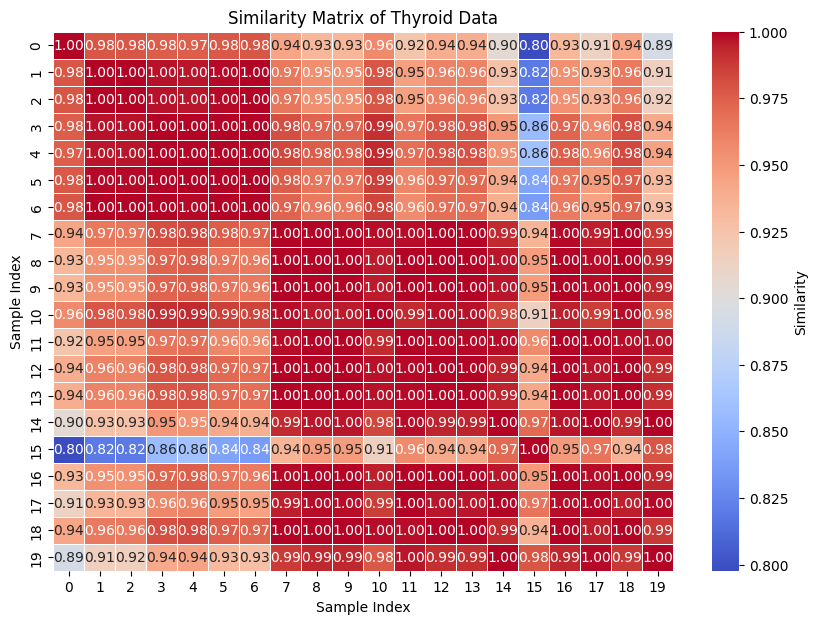

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load data
file_path = "/content/Lab Session Data.xlsx"
df = pd.read_excel(file_path, sheet_name="thyroid0387_UCI")

# Identify numeric and categorical columns
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns

# Fill missing values
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.median() if (abs(x - x.mean()) > 3 * x.std()).sum() > 0 else x.mean()))
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Normalize numeric data
df[num_cols] = MinMaxScaler().fit_transform(df[num_cols])

# Compute similarity metrics for first two samples
v1, v2 = df.iloc[0].astype(bool), df.iloc[1].astype(bool)
f11, f00 = sum(v1 & v2), sum(~v1 & ~v2)
f01, f10 = sum(~v1 & v2), sum(v1 & ~v2)

jaccard = f11 / (f01 + f10 + f11)
smc = (f11 + f00) / (f00 + f01 + f10 + f11)

vec1, vec2 = df.loc[0, num_cols].values, df.loc[1, num_cols].values
cosine_sim = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

print(f"Jaccard Similarity: {jaccard}\nSimple Matching Coefficient: {smc}\nCosine Similarity: {cosine_sim}")

# Compute similarity matrix
sim_matrix = np.zeros((20, 20))
for i in range(20):
    for j in range(20):
        vi, vj = df.iloc[i].astype(bool), df.iloc[j].astype(bool)
        f11, f00 = sum(vi & vj), sum(~vi & ~vj)
        f01, f10 = sum(~vi & vj), sum(vi & ~vj)
        jc, smc = f11 / (f01 + f10 + f11), (f11 + f00) / (f00 + f01 + f10 + f11)
        cos_sim = np.dot(df.loc[i, num_cols], df.loc[j, num_cols]) / (np.linalg.norm(df.loc[i, num_cols]) * np.linalg.norm(df.loc[j, num_cols]))
        sim_matrix[i, j] = (jc + smc + cos_sim) / 3

# Plot similarity matrix
plt.figure(figsize=(10, 7))
sns.heatmap(sim_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Similarity'})
plt.title('Similarity Matrix of Thyroid Data')
plt.xlabel('Sample Index')
plt.ylabel('Sample Index')
plt.show()
